# Ryan Sikhrangkur
# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df1 = pd.read_csv('ab_data.csv')
df1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [4]:
df1['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
df1['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df1.query("group=='treatment' & landing_page!='new_page'").count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [7]:
df1.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df1.query("group=='control' & landing_page=='old_page'").append(df1.query("group=='treatment' & landing_page=='new_page'"))

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.loc[df2.user_id.duplicated(),'user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
df2 = df2.drop(2893, axis=0)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [14]:
df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_control = df2.query("group=='control'")['converted'].mean()
p_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treatment = df2.query("group=='treatment'")['converted'].mean()
p_treatment

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**It is not possible to say the new `treatment` group leads to more conversions.**<br>
- We see that the $p_{population}$ is 0.1196, the median/mean of $p_{control}$ (0.1204) and $p_{treatment}$ (0.1188).<br>
- $p_{control}$ is greater than $p_{treatment}$ by an actual difference of 0.0016.<br>
- The probability of receiving a `new_page` is 0.5, therefore the probability of receiving an `old_page` is also 0.5.<br>

>With these three factors to consider, it is far more likely to consider that the `control` group leads to greater or equal conversions than the `treatment` group.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**$H_0 : p_{new} - p_{old} \leq 0$**<br>**$H_1 : p_{new} - p_{old} > 0$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
# Working under the assumption that p_new = p_old = p_population under the null hypothesis, then p_new is equal to the mean
# of converted users in the dataset.
p_new = round(df2.converted.mean(), 4)
p_new

0.1196

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
# Working under the assumption that p_new = p_old = p_population under the null hypothesis, then p_old is equal to the mean
# of converted users in the dataset.
p_old = round(df2.converted.mean(), 4)
p_old

0.1196

**c.** What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = (df2['group']=='treatment').sum()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = (df2['group']=='control').sum()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.

In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control group
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
sim_diff = new_page_converted.mean() - old_page_converted.mean()
sim_diff

0.0011266698642831974


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for _ in range(10000) :
    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.

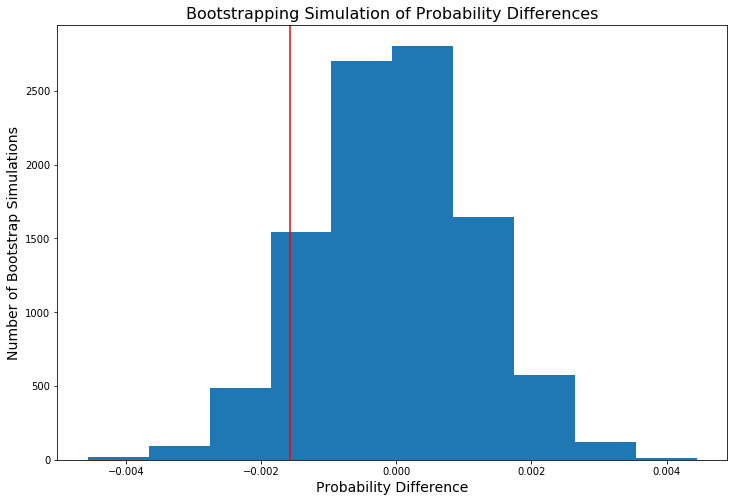

In [27]:
plt.figure(figsize=(12,8))
plt.hist(p_diffs)
plt.xlabel('Probability Difference', fontsize=14)
plt.ylabel('Number of Bootstrap Simulations', fontsize=14)
plt.title('Bootstrapping Simulation of Probability Differences', fontsize=16);
plt.axvline(obs_diff, color='r');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
# obs_diff was calculated in ToDo 1.4c
(p_diffs > obs_diff).mean()

0.90539999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

>The value we obtained in part j. is the `p-value`. The p-value can be interpreted as a measure of confidence in **$H_0$**; the closer to 1 the `p-value` is, the more confident we are in the null hypothesis.<br>
 In other words, we would reject **$H_0$** in favor of **$H_1$** if `p-value < Type I error rate`. The above `p-value` is rounded to 0.904, which is significantly higher than the `Type I error rate`, and therefore we would fail to reject **$H_0$**.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page=='old_page'")['converted'].sum()

# number of conversions with the new_page
convert_new = df2.query("landing_page=='new_page'")['converted'].sum()

# number of individuals who were shown the old_page
n_old = (df2['landing_page']=='old_page').sum()

# number of individuals who received new_page
n_new = (df2['landing_page']=='new_page').sum()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively.

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$.


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [30]:
import statsmodels.api as sm
# To-Do: Complete the sm.stats.proportions_ztest() method arguments
# Because the case for our alternative hypothesis is p_new - p_old > 0, the alternative will be set to 'larger'.
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>The `z-score` represents the number of standard deviations from the mean our sample data exists under a `bell-shaped curve`.<br>
Recalling the `empirical rule`, 68%, 95% and 99.7% of data exists under a `bell-shaped curve` 1, 2 and 3 standard deviations away from the mean respectively. Because the `Type I error rate` for **$H_0$** is 0.05 (5%) the `confidence interval` of **$H_0$** is 95%, which would suggest our data falls well within the `confidence interval` for **$H_0$** (`-1.960 < z-score = -1.311 < 1.960` for two-tailed test; `z-score = -1.311 < 1.645` for one-tailed test).<br><br>
The `p-value` as discussed previously is a measurement of our confidence in **$H_0$**, and the ztest result of 0.905 is far greater than the acceptable `Type I error rate`.<br><br>
These computations conclude that the bootstrap test and ztest are in agreement, and we would fail to reject the null hypothesis **$H_0$**.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>A **logistic regression** is the best model due to the `df2` data having only two possible options.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
df2[['drop_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('drop_page', 1)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-18 21:40 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

>The `p-value` associated with **ab_page** is 0.1899. It differs from the value in **Part II** because the model is based on a two-tailed alternative hypothesis.<br><br>
In **Part II**, the established null hypothesis was **$H_0: p_{new} - p_{old} \leq 0$**, making the alternative hypothesis **$H_1: p_{new} - p_{old} > 0$**. This is a right-tailed hypothesis, for which we obtained a `p-value` of 0.905.<br><br>
Here we can tell the model is based on a two-tailed hypothesis because the `confidence interval` of 95% is set between the 0.025 and 0.975 percentiles, and the `Typer I error rate` of 0.05 would be divided evenly outside those boundaries. This would make the null hypothesis of this model **$H_0: p_{new} - p_{old} = 0$** and the alternative hypothesis **$H_1: p_{new} - p_{old} \neq 0$**.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>It would be a good idea to consider other factors for the regression model because there could be interactions between these factors and the `treatment` variable, and how these effect converts. These other variables, or confounding factors, can help prevent a biased result.<br><br>
However, too many confounding factors can lead to multicollinearity; a symptom which creates skewed results because multiple independent variables are intercorrelated with each other.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns.

 Provide the statistical output as well as a written response to answer this question.

In [34]:
# Read the countries.csv

df_merged = pd.read_csv('countries.csv')
df_merged.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# Join with the df2 dataframe

df_merged = df_merged.set_index('user_id').join(df2.set_index('user_id'), on='user_id')
df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
# Create the necessary dummy variables

df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [37]:
# Fit your model, and summarize the results

logit_mod = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','CA','UK']])
result = logit_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-18 21:40 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [38]:
# Create ab_page variables for each country
df_merged['CA_page'] = df_merged['CA'] * df_merged['ab_page']
df_merged['UK_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_page'] = df_merged['US'] * df_merged['ab_page']
df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,CA_page,UK_page,US_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [39]:
# Fit your model, and summarize the results

logit_mod = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','CA_page','UK_page','CA','UK']])
result = logit_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-18 21:40 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
==================================================================

"""

In [40]:
# Exponate the coefficient of country and ab_page conversion rates

1/np.exp(-0.0469), np.exp(0.0314), 1/np.exp(-0.0175), 1/np.exp(-0.0057)

(1.0480172021191829,
 1.0318981806179213,
 1.0176540221507617,
 1.0057162759095335)

>From the regression model we can draw observations for the relationship of country with conversion rates, and we whether the null hypothesis should be rejected.

>After exponating the coefficient, holding other variables constant, we can interpret that:
 - Conversion rates for US is 1.01 times greater than UK, and 1.02 times greater than CA.<br><br>
No conversion rate from any country deviates away from 1.

>After exponanting the coefficient, holding other variables constant, we can interpret that:
 - Conversion rates for US_page is 1.03 times less than UK_page, and 1.05 times greater than CA_page.<br><br>
No conversion rate from any country deviates away from 1.

>The p-value of CA, UK, and US are all greater than the `Type I error rate` of 0.05. The z-score of all countries is also within the 95% confidence interval for two-tailed tests, `-1.960 < z-score < 1.960`, as established in **Part II**.

>The p-values of CA_page, UK_page, and US_page are all greater than the `Type I error rate` of 0.05. The z-score of all pages is also within the 95% confidence interval for two-tailed tests, `-1.960 < z-score < 1.960`, as established in **Part II**.

<a id='finalcheck'></a>
## Final Summary
**Part I** we reviewed basic information of the dataset, including the proportion of users are assigned to each `group` and `landing_page`. Once cleaned we performed quick calculations of things such as the `converted` mean for each `group` and the dataset.

**Part II** we established a null (**$H_0$**) and alternative (**$H_1$**) hypothesis:

>**$H_0: p_{new} - p_{old} \leq 0$** <br> **$H_1: p_{new} - p_{old} > 0$**

We would test this hypothesis first through bootstrapping and then with a ztest. The results of the bootstrap test showed that our `p-value` was far above the `Type I error rate`, and the test would **fail to reject $H_0$**. Upon performing the ztest, our **$Z_{score}$** was below the critical value **$Z_{\alpha}$** and the `p-value` was also well above the `Type I error rate` which is consistent with the bootstrap test. This experiment would also **fail to reject $H_0$**.

**Part III** we tested the data through a logistic regression model with an `ab_page` measurement based on users assigned to the `treatment` group, then added countries where these users were assigned pages to look for correlation and prevent the results from being biased. From there we calculated the `ab_page` per country for a new model. The result showed that there was no correlation between country of assignment and converts, and that all countries and their respective `ab_page` had a `p-value` which would **fail to reject $H_0$**

Therefore, with the above tests performed we conclude that we would fail to reject **$H_0$**, and continue the experiment with the hypothesis that there is no difference of conversion rates between pages.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0